# Loan Prediction using Machine Learning

### In this project, we will predict whether a customer will get the loan from bank or not.

Following Factors are:
1. Gender
2. Education
3. Marrital status
4. Loand Amount
5. Credit History
6. Account Balance
7. Property Area
8. Credit History
9. Dependants
10. Self Employment Status

There are more factors also, let see in this notebook

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('C:/Users/Adi/Desktop/Streamlit_Bank_Loan_Prediction-master')

In [2]:
## Pandas
## Numpy
## SKlearn
## Matplotlib

In [2]:
train=pd.read_csv('./Loan_Data/train.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

## Check the missing Values in data

In [3]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Preprocessing on the data

In [3]:
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
test=pd.read_csv('./Loan_Data/test.csv')
Loan_ID=test.Loan_ID
data=pd.concat([train,test])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [15]:
data.shape

(981, 12)

In [16]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [17]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [18]:
data.Dependents.dtypes

dtype('O')

<AxesSubplot:>

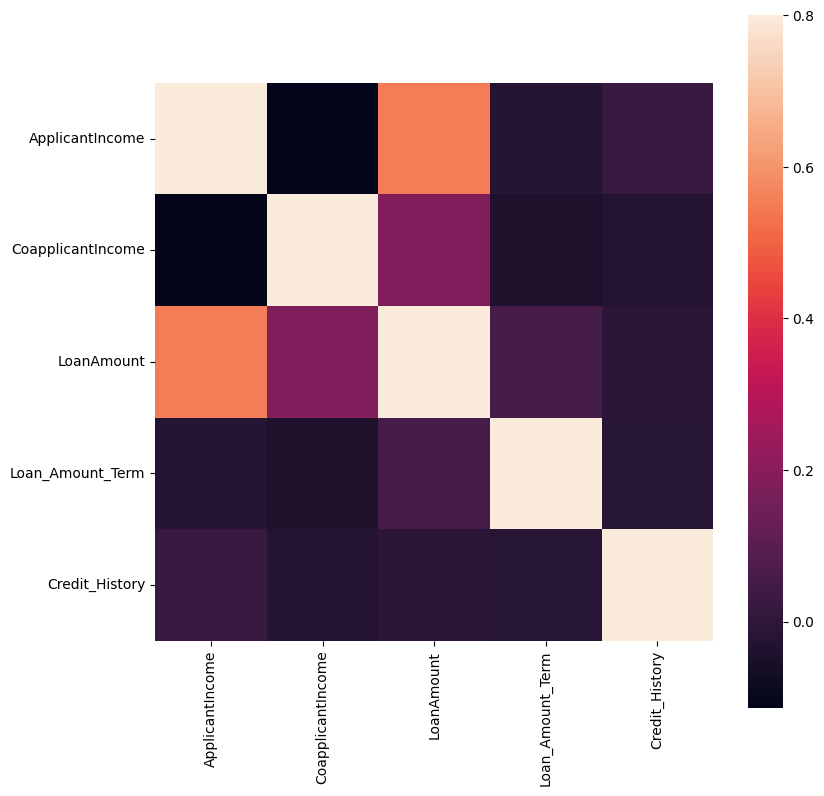

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

## Label ENcode

In [4]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

<AxesSubplot:>

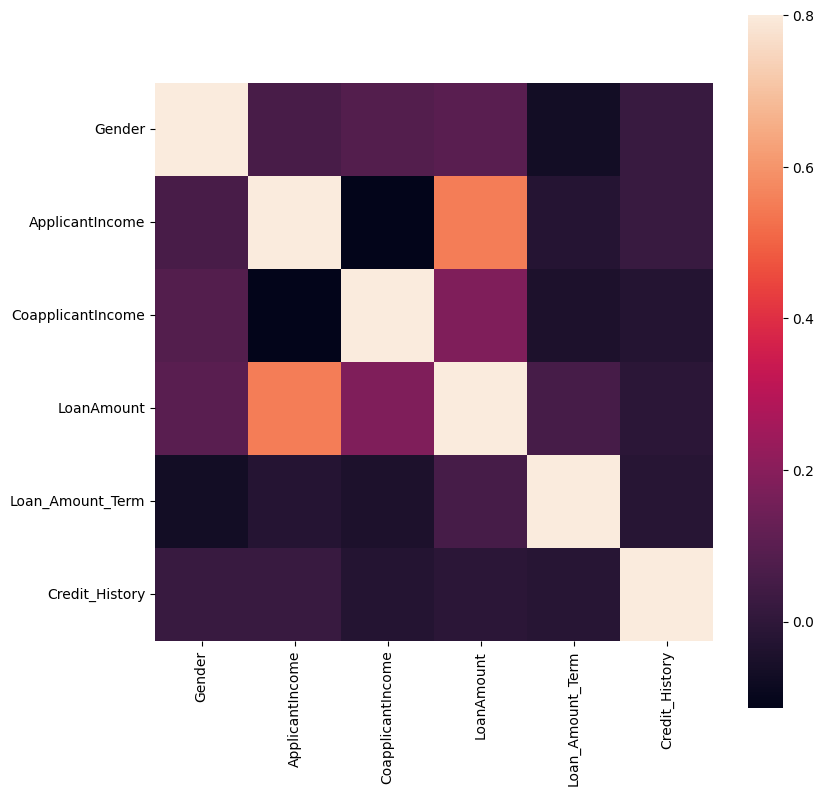

In [7]:
## Let's see correlations
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [5]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})

In [9]:
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [6]:
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [11]:
data.Dependents.value_counts()

0.0    545
1.0    160
2.0    160
3.0     91
Name: Dependents, dtype: int64

<AxesSubplot:>

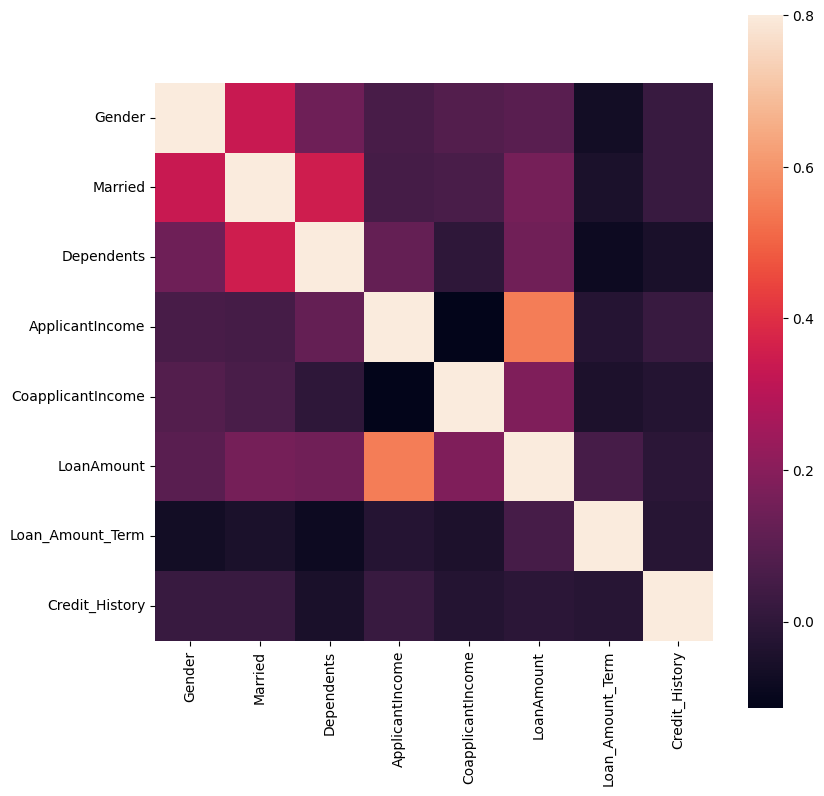

In [26]:
## Let's see correlations for it
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [7]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [28]:
data.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

In [8]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [30]:
data.Self_Employed.value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [31]:
data.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [9]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [33]:
data.Property_Area.value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

<AxesSubplot:>

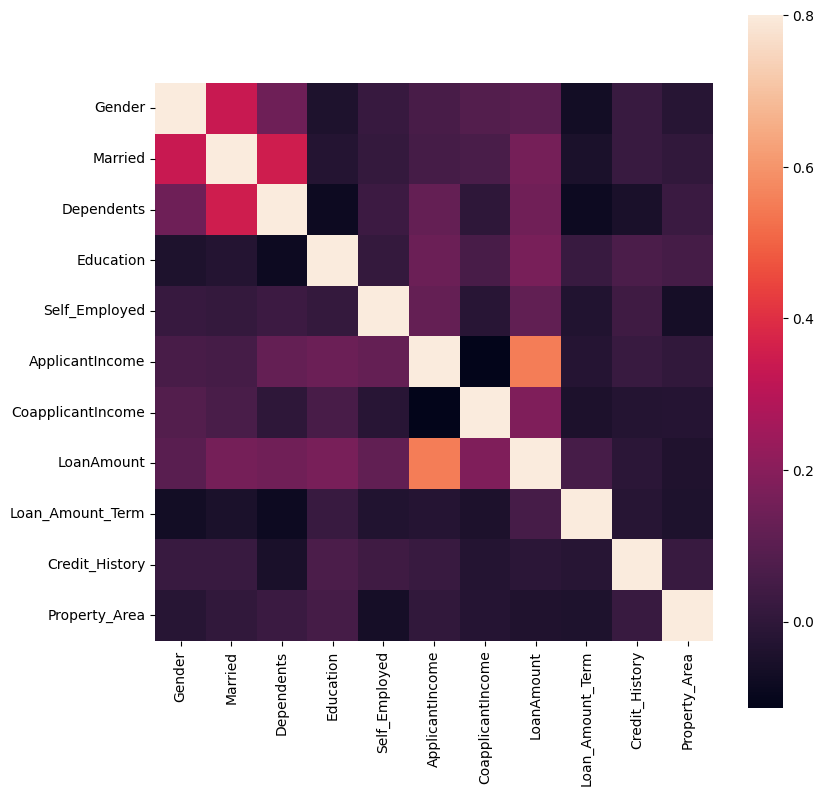

In [34]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [36]:
data.Credit_History.size

981

## It's time to fill the missing values

In [10]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [38]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [11]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [40]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [12]:
## Filling with median
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [13]:
## Filling with mean
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [43]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [44]:
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [14]:
## Filling Gender with random number between 0-2
from random import randint 
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [47]:
data.Gender.value_counts()

1.0    799
0.0    182
Name: Gender, dtype: int64

In [15]:
## Filling Dependents with median
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [48]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

<AxesSubplot:>

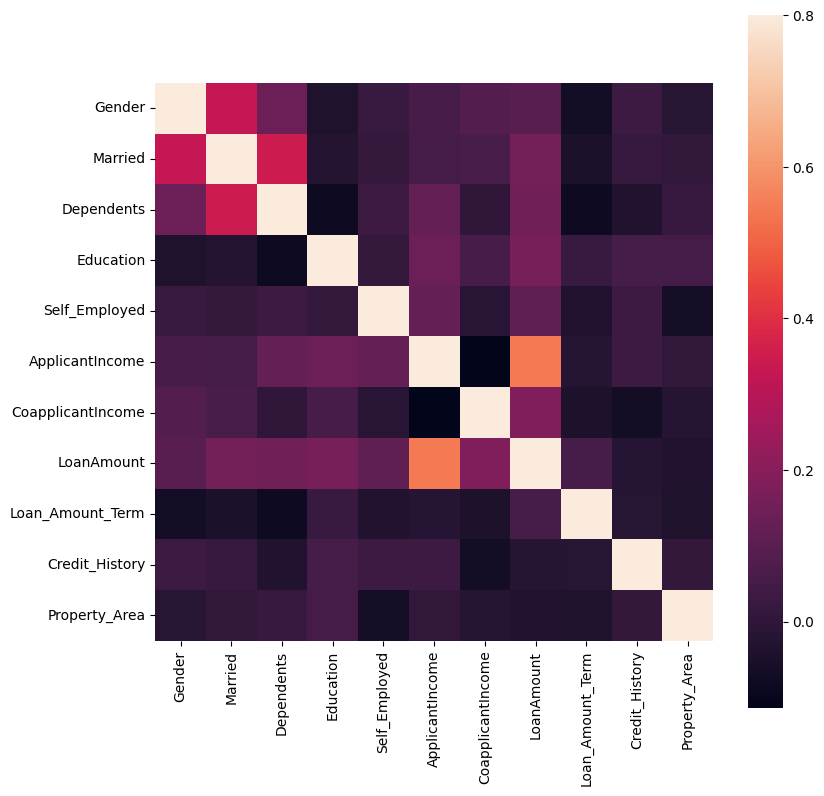

In [49]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [16]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [51]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [52]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [17]:
## Dropping Loan ID from data, it's not useful
data.drop('Loan_ID',inplace=True,axis=1)

In [54]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [55]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [19]:
data = pd.DataFrame(data)

## Split the Data into X & Y

In [20]:
train_X=data.iloc[:614,] ## all the data in X (Train set)
train_y=Loan_status  ## Loan status will be our Y

In [21]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [29]:
train_X.head()

,0,1,2,3,4,5,6,7,8,9,10
46,0.477268,0.744765,0.225618,0.534522,-0.371552,0.082429,-0.589506,-1.284198,0.276368,0.54869,1.18242
272,0.477268,-1.342705,-0.745132,0.534522,-0.371552,-0.412283,0.093871,-0.210291,0.276368,0.54869,-1.31479
474,0.477268,-1.342705,1.196367,0.534522,-0.371552,0.061875,1.120961,0.261181,0.276368,0.54869,-1.31479
382,-2.095259,-1.342705,-0.745132,0.534522,-0.371552,0.144093,-0.589506,0.182603,0.276368,0.54869,1.18242
283,-2.095259,-1.342705,-0.745132,0.534522,-0.371552,-0.591826,0.023583,-1.153234,0.276368,0.54869,1.18242


In [30]:
test_X.head()

,0,1,2,3,4,5,6,7,8,9,10
454,0.477268,-1.342705,-0.745132,0.534522,2.691412,0.334704,-0.589506,-0.760341,0.276368,0.54869,-0.066185
52,-2.095259,-1.342705,-0.745132,0.534522,-0.371552,-0.166859,-0.589506,-0.393641,0.276368,0.54869,-0.066185
536,0.477268,0.744765,-0.745132,0.534522,-0.371552,0.167458,0.847904,2.382804,0.276368,0.54869,1.182420
469,0.477268,0.744765,-0.745132,0.534522,-0.371552,-0.148764,0.312463,-0.419834,0.276368,0.54869,1.182420
55,0.477268,0.744765,1.196367,0.534522,-0.371552,-0.434242,-0.160049,-0.590087,0.276368,0.54869,-0.066185


## Using Different types of Machine Learning Model

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Fit the all ML Models

In [23]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [24]:
scoring='accuracy'

In [25]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [26]:
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

LogisticRegression()
Logistic Regression 0.802174
DecisionTreeClassifier()
Decision Tree 0.673913
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.802174
RandomForestClassifier()
Random Forest 0.782609
SVC()
Support Vector Classifier 0.800000
KNeighborsClassifier()
K- Neirest Neighbour 0.758696
GaussianNB()
Naive Bayes 0.791304


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.8376623376623377
[[ 20  23]
 [  2 109]]
              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



In [28]:
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0]


In [29]:
X_test=data.iloc[614:,] 
# X_test[sc_f]=SC.fit_transform(X_test[sc_f])

In [39]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10
614,0.477268,0.744765,-0.745132,0.534522,-0.371552,0.094903,-0.589506,-0.419834,0.276368,0.548690,1.18242
615,0.477268,0.744765,0.225618,0.534522,-0.371552,-0.369593,-0.037505,-0.210291,0.276368,0.548690,1.18242
616,0.477268,0.744765,1.196367,0.534522,-0.371552,-0.031586,0.072895,0.863617,0.276368,0.548690,1.18242
617,0.477268,0.744765,1.196367,0.534522,-0.371552,-0.498892,0.347423,-0.550798,0.276368,-1.822522,1.18242
618,0.477268,-1.342705,-0.745132,-1.870829,-0.371552,-0.334457,-0.589506,-0.838920,0.276368,0.548690,1.18242


In [30]:
prediction = LR.predict(X_test)

In [31]:
print(prediction)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [33]:
## TAken data from the dataset
t = LR.predict(scaler.fit_transform([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]]))

In [34]:
print(t)

[1]


In [35]:
import pickle
# now you can save it to a file
file = './Model/ML_Model.pkl'
with open(file, 'wb') as f:
    pickle.dump(LR, f)

In [36]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [37]:
scalerfile = './Model/scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [38]:
scalerfile = './Model/scaler.sav'
scaler = pickle.load(open(scalerfile, 'rb'))

In [39]:
cy = k.predict(scaler.fit_transform([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]]))
print(cy)

[1]
